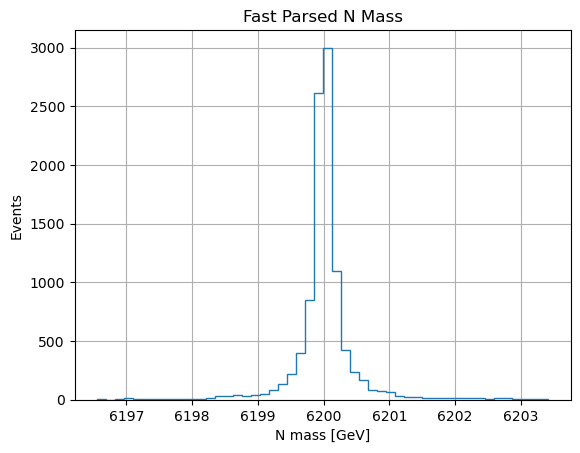

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def get_mass(px, py, pz, E):
    return np.sqrt(max(E**2 - px**2 - py**2 - pz**2, 0))

def fast_extract_Nmass(lhe_path, pid_target=9900012):
    Nmasses = []
    with open(lhe_path, "r") as f:
        for line in f:
            if line.strip().startswith("<") or line.strip() == "":
                continue
            cols = line.strip().split()
            if len(cols) < 10:
                continue
            try:
                pid = int(cols[0])
                if pid == pid_target:
                    px, py, pz, E = map(float, cols[6:10])
                    mass = get_mass(px, py, pz, E)
                    Nmasses.append(mass)
            except:
                continue
    return Nmasses

lhe_path = "/data6/Users/snuintern1/tbchannel/gen_for_tb_LRSM/condorfiles/LO/result_WR6500_N6200/cmsgrid_final.lhe"
masses = fast_extract_Nmass(lhe_path)

plt.hist(masses, bins=50, histtype='step')
plt.xlabel("N mass [GeV]")
plt.ylabel("Events")
plt.title("Fast Parsed N Mass")
plt.grid(True)
plt.show()